In [1]:
# import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Data pre-processing

In [49]:
# load the data and drop Nan includes values

data = pd.read_csv("coffee-prices-historical-chart-data.csv")
data.dropna(inplace=True)

In [50]:
# A short glance at the data 

data.head()

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660


In [51]:
# Add a new column name "time" for using Time-Step featuring

data['time'] = np.arange(len(data['date']))
data.head()

,date,value,time
0,1973-08-20,0.6735,0
1,1973-08-21,0.6710,1
2,1973-08-22,0.6580,2
3,1973-08-23,0.6675,3
4,1973-08-24,0.6660,4


In [52]:
# Add a new column name lag_1 for using Lag Featuring

data["lag_1"] = data["value"].shift(1)
data.head()

,date,value,time,lag_1
0,1973-08-20,0.6735,0,NaN
1,1973-08-21,0.6710,1,0.6735
2,1973-08-22,0.6580,2,0.6710
3,1973-08-23,0.6675,3,0.6580
4,1973-08-24,0.6660,4,0.6675


In [53]:
# set Independent Variable (feature) and Dependent Variable for both Featuring approaches


X_time_f = data.loc[:, 'time'].values
y_time_f = data.loc[:, "value"].values
y_lag_f = data.loc[:, "value"]
X_lag_f = data.loc[:, "lag_1"]
X_lag_f.dropna(inplace=True)
y_lag_f, X_lag_f = y_lag_f.align(X_lag_f, join="inner")

In [54]:
# data reshape
X_time_f = np.reshape(X_time_f, (-1, 1))
y_time_f = np.reshape(y_time_f, (-1, 1))
X_lag_f = X_lag_f.values
y_lag_f = y_lag_f.values
X_lag_f = np.reshape(X_lag_f, (-1, 1))
y_lag_f = np.reshape(y_lag_f, (-1, 1))

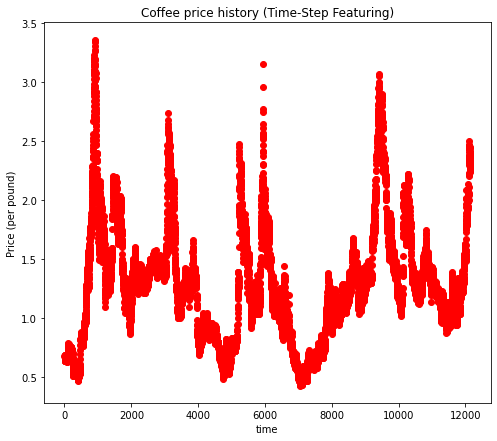

In [55]:
# A glance at the data for Time-Step Featuring

plt.figure(figsize=(8,7))
plt.scatter(X_time_f, y_time_f, color='red')
plt.title('Coffee price history (Time-Step Featuring)')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

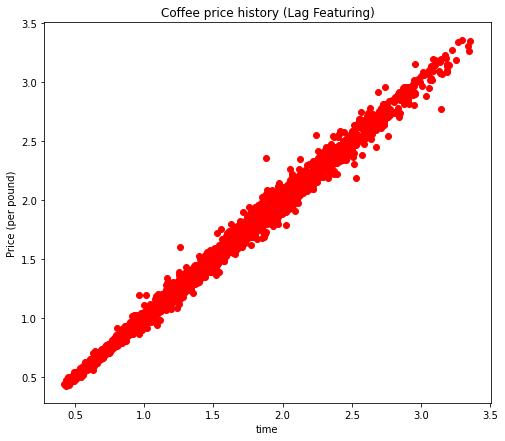

In [57]:
# A glance at the data for Lag Featuring

plt.figure(figsize=(8,7))
plt.scatter(X_lag_f, y_lag_f, color='red')
plt.title('Coffee price history (Lag Featuring)')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

# 2. Simple Linear Regression

In [80]:
def run_simple_linear_reg(X, y, plot_title, plot_x_label, plot_y_label):
    lr_reg = LinearRegression()
    # train the Linear Regrssion model
    lr_reg.fit(X, y)
    # make prediction with Linear Regrssion
    lr_reg_y_pred = lr_reg.predict(X)
    # Linear Regression Coeficient and intercept values
    print("Coef: {}".format(lr_reg.coef_))
    print("Intercept:  {}".format(lr_reg.intercept_))
    print()
    # A glance at the data and fit line
    plt.figure(figsize=(8,7))
    plt.scatter(X, y, color='red')
    plt.plot(X, lr_reg_y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    # R2 score 
    r2 = r2_score(y, lr_reg_y_pred)
    return r2

## 2.1 Simple Linear Regression (Time-Step Feature)

Coef: [[4.23832375e-06]]
Intercept:  [1.24153714]



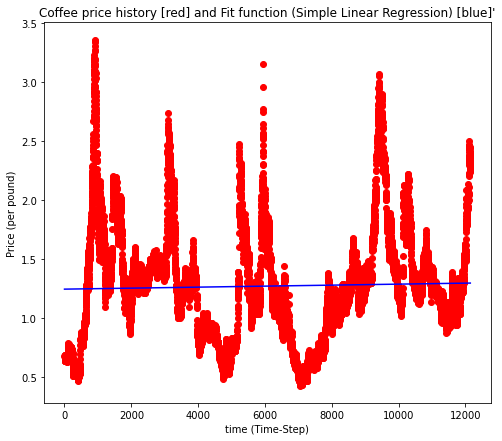

In [81]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Simple Linear Regression) [blue]'"
slr_reg_time_step_r2 =  run_simple_linear_reg(X_time_f, y_time_f, title, x_label, y_label)

In [82]:
# R2 score 

print("R2_score for Simple Linear Regression (Time-Step Featuring):  {}".format(slr_reg_time_step_r2))

R2_score for Simple Linear Regression (Time-Step Featuring):  0.0009630245399825377


## 2.2 Simple Linear Regression (Lag Feature)

Coef: [[0.99803036]]
Intercept:  [0.00263632]



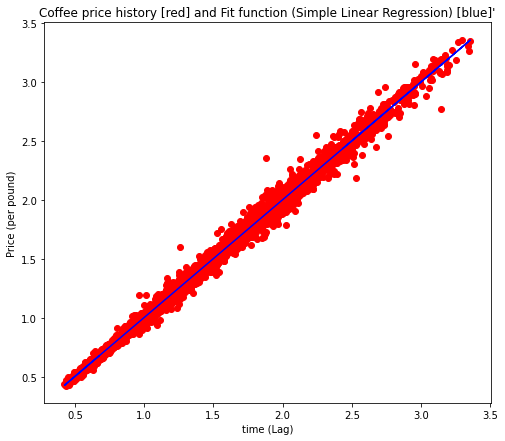

In [83]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Simple Linear Regression) [blue]'"
slr_reg_lag_r2 =  run_simple_linear_reg(X_lag_f, y_lag_f, title, x_label, y_label)

In [85]:
# R2 score 

slr_reg_lag_r2 = r2_score(y_lag_f, lr_reg_lag_y_pred)
print("R2_score for Simple Linear Regression (Lag Featuring):  {}".format(slr_reg_lag_r2))

R2_score for Simple Linear Regression (Lag Featuring):  0.995748702262255


# 3. Polynomial Linear Regression

In [87]:
def run_polynomial_reg(X, y, degree, plot_title, plot_x_label, plot_y_label):
    # create Polynimial feature 
    poly_feature = PolynomialFeatures(degree=degree)
    X_poly = poly_feature.fit_transform(X)
    # fit the model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    # prediction
    y_pred = poly_model.predict(X_poly)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    plt.scatter(X_poly[:, 1], y, color="red")
    plt.plot(X_poly[:, 1], y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y, y_pred)
    return r2    

## 3.1 Polynomial Linear Regression (Time-Step Featuring)

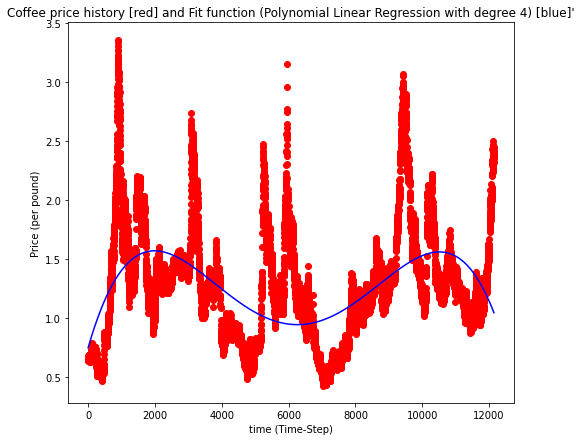

In [88]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Polynomial Linear Regression with degree 4) [blue]'"
plr_time_step_r2 =  run_polynomial_reg(X_time_f, y_time_f, 4, title, x_label, y_label)

In [89]:
# R2 core 

print("R2_score for Polynomial Linear Regression (time-step):  {}".format(plr_time_step_r2))

R2_score for Polynomial Linear Regression (time-step):  0.2134102112817461


## 3.2 Polynomial Linear Regression (Lag Featuring)

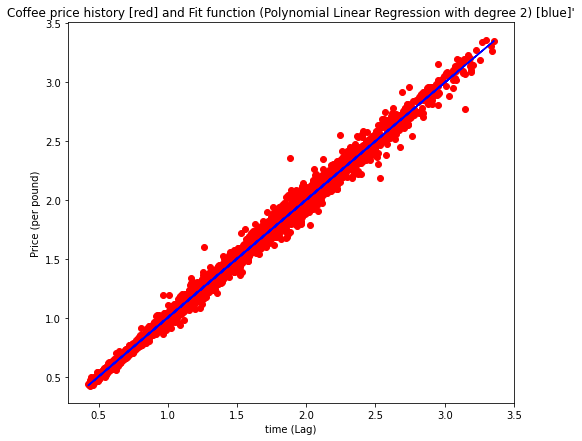

In [94]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Polynomial Linear Regression with degree 2) [blue]'"
plr_lag_r2 =  run_polynomial_reg(X_lag_f, y_lag_f, 2, title, x_label, y_label)

In [95]:
# R2 core 

print("R2_score for Polynomial Linear Regression (Lag):  {}".format(plr_lag_r2))

R2_score for Polynomial Linear Regression (Lag):  0.9957512419230504


# 4. Support Vector Regressor 

In [96]:
def run_svr_reg(X, y, plot_title, plot_x_label, plot_y_label):
    # Support Vectore Regrssion Model
    svr_reg = SVR(kernel='rbf')
    svr_reg.fit(X, y)
    # prediction 
    y_pred = svr_reg.predict(X)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    plt.scatter(X, y, color="red")
    plt.plot(X, y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y, y_pred)
    return r2   

## 4.1 Support Vector Regressor (Time-Step Feature)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


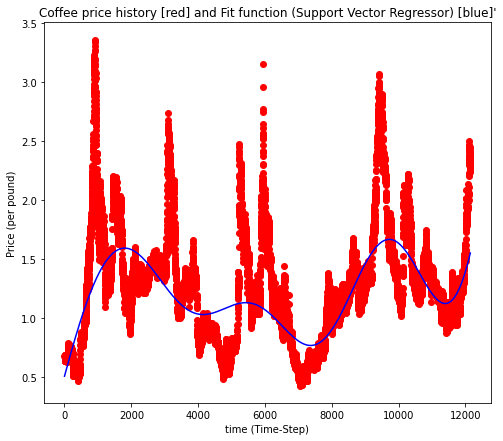

In [97]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Support Vector Regressor) [blue]'"
svr_reg_time_step_r2 =  run_svr_reg(X_time_f, y_time_f, title, x_label, y_label)

In [98]:
# R2 score

print("R2_score for Support Vector Regression (Time-Step):  {}".format(svr_reg_time_step_r2))

R2_score for Support Vector Regression (Time-Step):  0.39132964499600953


## 4.2 Support Vector Regressor (Lag Feature)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


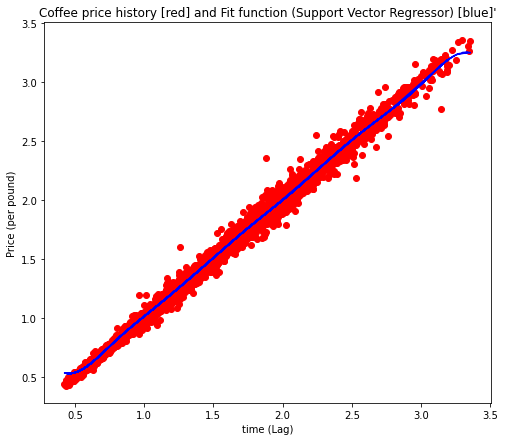

In [99]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Support Vector Regressor) [blue]'"
svr_reg_lag_r2 =  run_svr_reg(X_lag_f, y_lag_f, title, x_label, y_label)

In [100]:
# R2 score

print("R2_score for Support Vector Regression (Lag):  {}".format(svr_reg_lag_r2))

R2_score for Support Vector Regression (Lag):  0.9953218837986322


# 5. Decision Tree

In [101]:
def run_dtree_reg(X, y, plot_title, plot_x_label, plot_y_label):
    # build the model
    dtree_regressor = DecisionTreeRegressor(random_state=0)
    dtree_regressor.fit(X, y)
    # prediction 
    y_pred = dtree_regressor.predict(X)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    plt.scatter(X, y, color="red")
    plt.plot(X, y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y, y_pred)
    return r2   

## 5.1 Decision Tree (Time-Step Featuring)

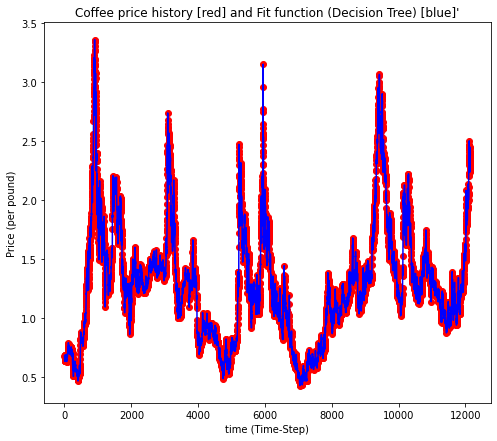

In [102]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Decision Tree) [blue]'"
dtree_reg_time_step_r2 =  run_dtree_reg(X_time_f, y_time_f, title, x_label, y_label)

In [103]:
# R2 Score

print("R2_score for Decision Tree Regression (Time-Step):  {}".format(dtree_reg_time_step_r2))

R2_score for Decision Tree Regression (Time-Step):  1.0


## 5.2 Decision Tree (Lag Featuring)

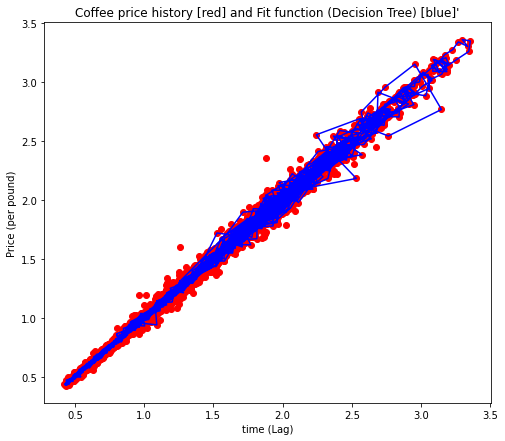

In [104]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Decision Tree) [blue]'"
dtree_reg_lag_r2 =  run_dtree_reg(X_lag_f, y_lag_f, title, x_label, y_label)

In [105]:
# R2 Score

print("R2_score for Decision Tree Regression (Lag):  {}".format(dtree_reg_lag_r2))

R2_score for Decision Tree Regression (Lag):  0.9979199750246532


# 6. Random Forest

In [111]:
def run_rForest_reg(X, y, n_estim, plot_title, plot_x_label, plot_y_label):
    # build the model
    rf_regressor = RandomForestRegressor(n_estimators=n_estim, random_state=0)
    rf_regressor.fit(X, y)
    # prediction 
    y_pred = rf_regressor.predict(X)
    # A glance at the data and fit function
    plt.figure(figsize=(8,7))
    plt.scatter(X, y, color="red")
    plt.plot(X, y_pred, color="blue")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    r2 = r2_score(y, y_pred)
    return r2  

## 6.1 Random Forest (Time-Step)

/tmp/ipykernel_15901/2542344017.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X, y)


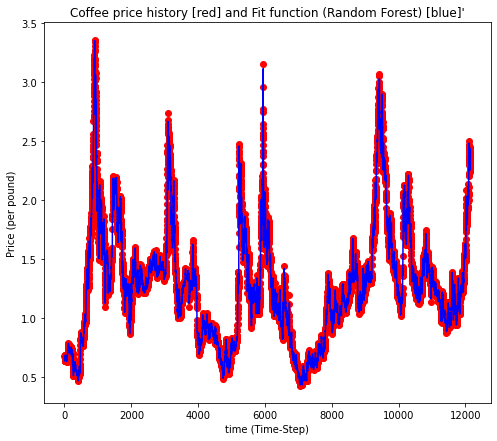

In [114]:
x_label = "time (Time-Step)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Random Forest) [blue]'"
rforest_reg_time_step_r2 =  run_rForest_reg(X_time_f, y_time_f, 10, title, x_label, y_label)

In [115]:
# R2 Score

print("R2_score for Random Forest Regression (Time-Step):  {}".format(rforest_reg_time_step_r2))

R2_score for Random Forest Regression (Time-Step):  0.9995058452556388


## 6.2 Random Forest (Lag)

/tmp/ipykernel_15901/2542344017.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X, y)


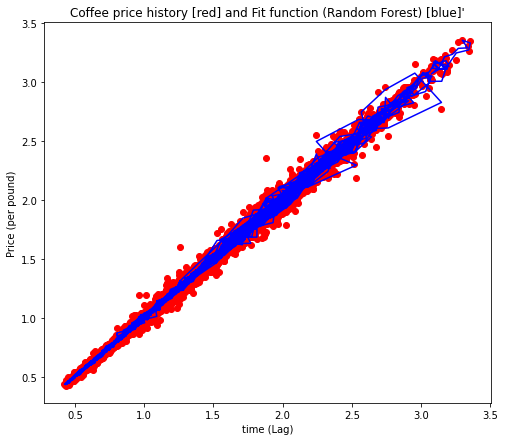

In [116]:
x_label = "time (Lag)"
y_label = "Price (per pound)"
title = "Coffee price history [red] and Fit function (Random Forest) [blue]'"
rforest_reg_lag_r2 =  run_rForest_reg(X_lag_f, y_lag_f, 10, title, x_label, y_label)

In [117]:
# R2 Score

print("R2_score for Random Forest Regression (Lag):  {}".format(rforest_reg_lag_r2))

R2_score for Random Forest Regression (Lag):  0.9975191537268844


In [201]:
# build the model

rf_regressor = RandomForestRegressor(n_estimators=3, random_state=0)
rf_regressor.fit(X_train, y_train)

/tmp/ipykernel_56101/1426269959.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=3, random_state=0)

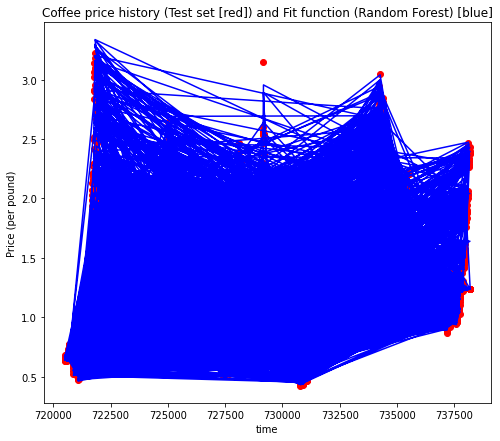

In [202]:
# A glance at the data and fit function

plt.figure(figsize=(8,7))
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, rf_regressor.predict(X_train), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Random Forest) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [203]:
# R2 score

y_pred = rf_regressor.predict(X_test)
rf_reg_r2 = r2_score(y_test, y_pred)
print("R2_score for Random Forest Regression:  {}".format(dtree_reg_r2))

R2_score for Random Forest Regression:  0.9941192138891557


## Model R2 Scores

In [204]:
print("Simple Linear Regression:  {}".format(slr_r2))
print("Polynomial Linear Regression:  {}".format(plr_r2))
print("Support Vector Regression:  {}".format(svr_r2))
print("Decision Tree Regression:  {}".format(dtree_reg_r2))
print("Random Forest Regression:  {}".format(rf_reg_r2))

Simple Linear Regression:  0.0003317114344260075
Polynomial Linear Regression:  0.03759745234500955
Support Vector Regression:  0.3638723180106719
Decision Tree Regression:  0.9941192138891557
Random Forest Regression:  0.9951710246265504


## Coffee Price Prediction

**Random Forest** model is used for prediction due to the higher R2 score

### 2023-01-01

In [205]:
f1_date = dt.strptime("2023-01-01", "%Y-%m-%d").date().toordinal()
f1_pred = rf_regressor.predict([[f1_date]])
print("Coffee price prediction for 2023-01-01:  {} ".format(f1_pred[0]))

Coffee price prediction for 2023-01-01:  1.237 


### 2023-06-01

In [208]:
f2_date = dt.strptime("2023-06-01", "%Y-%m-%d").date().toordinal()
f2_pred = rf_regressor.predict([[f2_date]])
print("Coffee price prediction for 2023-06-01:  {} ".format(f2_pred[0]))

Coffee price prediction for 2023-06-01:  1.237 
